## This Notebook analyzes and concludes the impact of Vaccines on covid-19 cases in Indian States.
### COVID-19 is caused by a coronavirus called SARS-CoV-2. The disease along with several mutations has caused a global pandemic with death toll of 6+ millions
### At this point, it becomes really important to vaccinate in order to prevent further mutations 
### In this project we analyse covid 19 data of Indian states and infer the impact of vaccines in the same
### Dataset: Kaggle.com

In [38]:
#Importing Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
path = ''

In [2]:
#Importing data set
covid_df = pd.read_csv(path+ 'covid_19_india.csv')
vaccine_df = pd.read_csv(path+ 'covid_vaccine_statewise.csv')

In [3]:
#Dropping unwanted columns
covid_df.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational'], inplace=True, axis=1)

covid_df


,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


In [4]:
# Converting date format
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%Y-%m-%d'
                    )
covid_df

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
...,...,...,...,...,...
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


In [5]:
# Deducing active cases
covid_df['Active_Cases']= covid_df['Confirmed']- covid_df['Cured']-covid_df.Deaths
covid_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [6]:
# Using pivot table to find max count of cases per state
statewise= pd.pivot_table(covid_df, values =['Confirmed','Deaths','Cured'],
                         index= "State/UnionTerritory", aggfunc= 'max').sort_values(by='Confirmed', ascending= False)
statewise

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Maharashtra,6363442,6159676,134201
Maharashtra***,6229596,6000911,130753
Kerala,3586693,3396184,18004
Karnataka,2921049,2861499,36848
Karanataka,2885238,2821491,36197
Tamil Nadu,2579130,2524400,34367
Andhra Pradesh,1985182,1952736,13564
Uttar Pradesh,1708812,1685492,22775
West Bengal,1534999,1506532,18252


In [7]:
# Deduce recover and mortality rate
statewise['Recovery_rate'] = 100*statewise["Cured"]/statewise['Confirmed']
statewise['Mortality_rate'] = 100*statewise["Deaths"]/statewise['Confirmed']
statewise

,Confirmed,Cured,Deaths,Recovery_rate,Mortality_rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


In [8]:
#Heat map
statewise.style.background_gradient(cmap='plasma')

,Confirmed,Cured,Deaths,Recovery_rate,Mortality_rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


In [9]:

statewise2= pd.pivot_table(covid_df, values =['Confirmed','Deaths','Cured','Active_Cases'],
                         index= "State/UnionTerritory", aggfunc= 'max').sort_values(by='Active_Cases', ascending= False)
statewise2



,Active_Cases,Confirmed,Cured,Deaths
State/UnionTerritory,,,,
Maharashtra,701614,6363442,6159676,134201
Karnataka,605515,2921049,2861499,36848
Kerala,445692,3586693,3396184,18004
Tamil Nadu,313048,2579130,2524400,34367
Uttar Pradesh,310783,1708812,1685492,22775
Rajasthan,212753,953851,944700,8954
Andhra Pradesh,211554,1985182,1952736,13564
Gujarat,148297,825085,814802,10077
West Bengal,132181,1534999,1506532,18252


In [10]:
top_10_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Active_Cases','Date']].sort_values(by = 'Active_Cases', ascending= False).reset_index()
top_10_active_cases

,State/UnionTerritory,Active_Cases,Date
0,Maharashtra,701614,2021-08-11
1,Karnataka,605515,2021-08-11
2,Kerala,445692,2021-08-11
3,Tamil Nadu,313048,2021-08-11
4,Uttar Pradesh,310783,2021-08-11
5,Rajasthan,212753,2021-08-11
6,Andhra Pradesh,211554,2021-08-11
7,Gujarat,148297,2021-08-11
8,West Bengal,132181,2021-08-11
9,Chhattisgarh,131245,2021-08-11


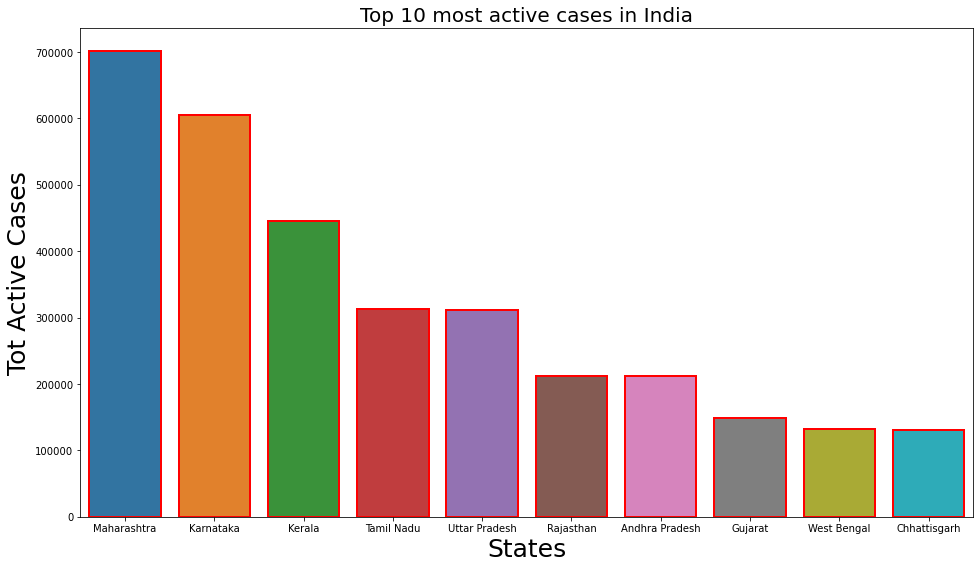

In [11]:
fig= plt.figure(figsize= (16,9))
plt.title("Top 10 most active cases in India", size =20)
ax= sns.barplot(data= top_10_active_cases.head(10), y= 'Active_Cases', x= 'State/UnionTerritory', linewidth=2, edgecolor='red' )
plt.xlabel("States", size=25)
plt.ylabel("Tot Active Cases", size=25)
plt.show()

In [12]:
# top states with highest deaths.
top_10_death_states = covid_df.groupby(by = 'State/UnionTerritory').max()[['Deaths','Date']].sort_values(by = 'Deaths', ascending= False).reset_index()
top_10_death_states

,State/UnionTerritory,Deaths,Date
0,Maharashtra,134201,2021-08-11
1,Maharashtra***,130753,2021-07-21
2,Karnataka,36848,2021-08-11
3,Karanataka,36197,2021-07-20
4,Tamil Nadu,34367,2021-08-11
5,Delhi,25068,2021-08-11
6,Uttar Pradesh,22775,2021-08-11
7,West Bengal,18252,2021-08-11
8,Kerala,18004,2021-08-11
9,Punjab,16322,2021-08-11


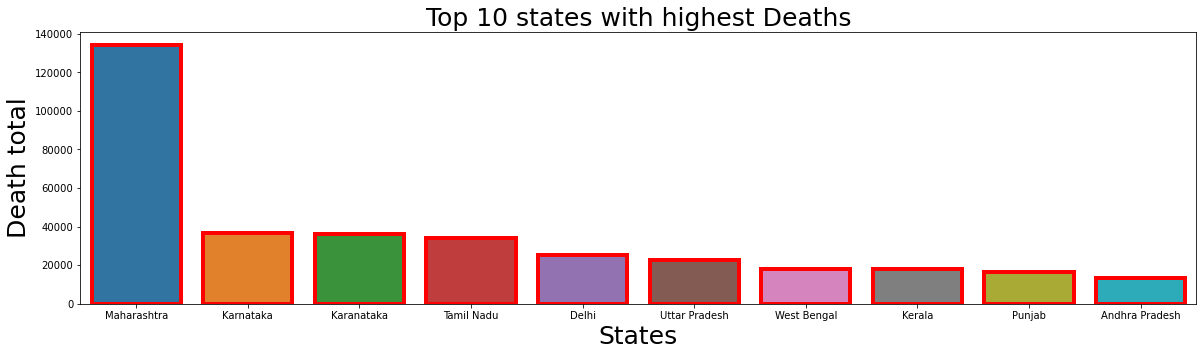

In [123]:
fig= plt.figure(figsize=(20,5))
plt.title("Top 10 states with highest Deaths", size=25)
ax= sns.barplot(data= top_10_death_states[~top_10_death_states['State/UnionTerritory'].isin(['Maharashtra***'])].head(10), y='Deaths', x= 'State/UnionTerritory', linewidth=4, edgecolor='red')
plt.xlabel("States", size=25)
plt.ylabel("Death total", size=25)
plt.show()


Text(0.5, 1.0, 'Covid_Wave_Line')

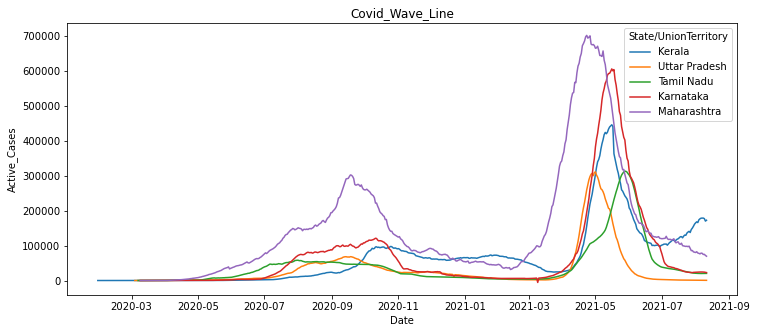

In [137]:
#Trend/ Wave Line
fig= plt.figure(figsize=(12,5))
ax= sns.lineplot(data= covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra','Karnataka','Kerala','Tamil Nadu', 'Uttar Pradesh'])], x='Date', y='Active_Cases', hue ='State/UnionTerritory')
ax.set_title("Covid_Wave_Line")




In [15]:
#Pre-processing for column rename
vaccine_df.rename(columns= { 'Updated On':'Vaccine_Date'}, inplace=True)
vaccine_df.rename(columns= { 'Total Individuals Vaccinated':'Total_Vaccinations'}, inplace=True)

vaccine_df['Vaccine_Date'] = pd.to_datetime(vaccine_df['Vaccine_Date'], format='%d/%m/%Y'
                    )
vaccine_df['Vaccine_Date'] = vaccine_df['Vaccine_Date'].dt.strftime('%Y-%m-%d')

vaccine_df= vaccine_df[vaccine_df.State !='India']
vaccine_df

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total_Vaccinations
212,2021-01-16,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,2021-01-17,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,2021-01-18,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,2021-01-19,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,2021-01-20,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,2021-08-11,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,2021-08-12,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,2021-08-13,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,2021-08-14,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# drop unwanted columns
vaccine_df.drop(columns =["Sputnik V (Doses Administered)"      ,
"AEFI"                                   ,
"18-44 Years (Doses Administered)"       ,
"45-60 Years (Doses Administered)"      ,
"60+ Years (Doses Administered)"      ,
"18-44 Years(Individuals Vaccinated)"    ,
"45-60 Years(Individuals Vaccinated)"    ,
"60+ Years(Individuals Vaccinated)" ]    , axis =1, inplace = True)
vaccine_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total_Vaccinations
212,2021-01-16,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0
213,2021-01-17,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0
214,2021-01-18,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,42.0
215,2021-01-19,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,89.0
216,2021-01-20,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,2021-08-11,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,2021-08-12,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,2021-08-13,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,2021-08-14,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Checking which values are null in orer to impute them
vaccine_df.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                218
Sessions                                218
 Sites                                  218
First Dose Administered                 218
Second Dose Administered                218
Male (Doses Administered)               218
Female (Doses Administered)             218
Transgender (Doses Administered)        218
 Covaxin (Doses Administered)           218
CoviShield (Doses Administered)         218
Male(Individuals Vaccinated)           7633
Female(Individuals Vaccinated)         7633
Transgender(Individuals Vaccinated)    7633
Total_Vaccinations                     1874
dtype: int64

In [18]:
import pandas as pd
import numpy as np
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import BayesianRidge
import random



imputer = IterativeImputer(BayesianRidge())
impute_data = pd.DataFrame(imputer.fit_transform(vaccine_df[['Total Doses Administered','Total Doses Administered'] ]))
impute_data
vaccine_df


,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total_Vaccinations
212,2021-01-16,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0
213,2021-01-17,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,23.0
214,2021-01-18,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,42.0
215,2021-01-19,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,89.0
216,2021-01-20,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,2021-08-11,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,2021-08-12,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,2021-08-13,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,2021-08-14,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


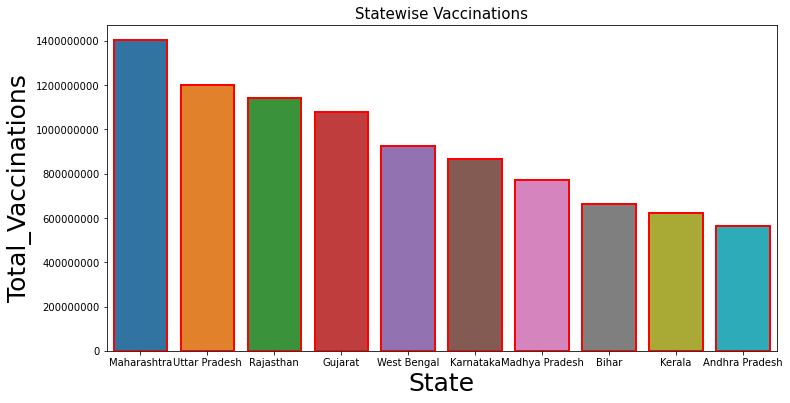

In [136]:
max_vax=vaccine_df.groupby('State').sum()[['Total Doses Administered','Total_Vaccinations']].sort_values(by = 'Total_Vaccinations', ascending= False).head(10)
fig, ax1 = plt.subplots(figsize=(12,6))
x= sns.barplot(data= max_vax.head(10), y=max_vax.Total_Vaccinations , x= max_vax.index, linewidth=2, edgecolor='red' )
plt.xlabel("State", size=25)
plt.ylabel("Total_Vaccinations", size=25)
plt.title("Statewise Vaccinations", size = 15)
plt.ticklabel_format(style='plain', axis='y')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

<ipython-input-102-cfeee589cb68>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)


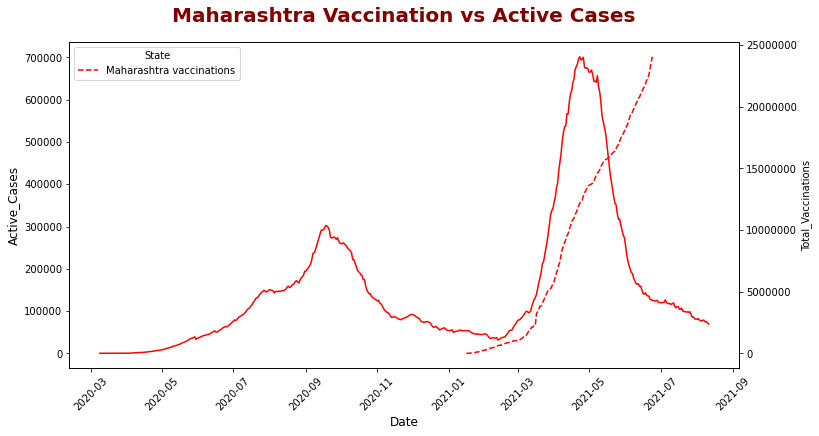

In [102]:

covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%m/%Y',infer_datetime_format=True)

vaccine_df['Vaccine_Date'] = pd.to_datetime(vaccine_df['Vaccine_Date'], format='%m/%Y', infer_datetime_format=True)

#Plotting the graph for top 10 states
fig, ax1 = plt.subplots(figsize=(12,6))

#plotting a line graph covid cases
sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra'])], x='Date', y='Active_Cases', ax=ax1,color='red')
ax1.set_ylabel(ax1.get_ylabel(),size=12)
ax1.set_xlabel('Date',size=12)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)

#ploting a line for vaccination numbers
ax2 = ax1.twinx()
plt_ax2=sns.lineplot(data=vaccine_df[vaccine_df['State'].isin(['Maharashtra'])], x='Vaccine_Date', y='Total_Vaccinations',  linestyle="dashed" ,ax=ax2,color='red')
plt.ticklabel_format(style='plain', axis='y')
plt_ax2.set_title('Maharashtra Vaccination vs Active Cases', fontdict={'fontsize': 20, 'fontweight': 700, 'color': 'maroon'}, pad=20) 
plt.legend(title='State', loc='upper left', labels=['Maharashtra vaccinations','Maharashtra cases'])
plt.show()


<ipython-input-138-306b281125a5>:18: UserWarning:

FixedFormatter should only be used together with FixedLocator



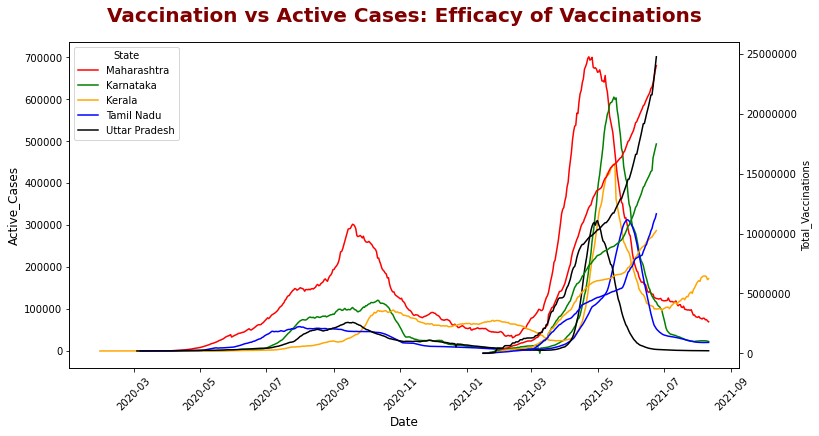

In [138]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%m/%Y',infer_datetime_format=True)

vaccine_df['Vaccine_Date'] = pd.to_datetime(vaccine_df['Vaccine_Date'], format='%m/%Y', infer_datetime_format=True)

#Plotting the graph for top 10 states
fig, ax1 = plt.subplots(figsize=(12,6))

#plotting a line graph covid cases

sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra'])], x='Date', y='Active_Cases', color='red', ax=ax1)
sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Karnataka'])], x='Date', y='Active_Cases',  color='green', ax=ax1)
sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Kerala'])], x='Date', y='Active_Cases',  color='orange', ax=ax1)
sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Tamil Nadu'])], x='Date', y='Active_Cases',  color='blue', ax=ax1)
sns.lineplot(data=covid_df[covid_df['State/UnionTerritory'].isin(['Uttar Pradesh'])], x='Date', y='Active_Cases', color='black', ax=ax1)

ax1.set_ylabel(ax1.get_ylabel(),size=12)
ax1.set_xlabel('Date',size=12)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)

#ploting a line for vaccination numbers
ax2 = ax1.twinx()
plt_ax2=sns.lineplot(data=vaccine_df[vaccine_df["State"].isin(['Maharashtra'])], x='Vaccine_Date', y='Total_Vaccinations', color='red' , ax=ax2)
plt_ax2=sns.lineplot(data=vaccine_df[vaccine_df["State"].isin(['Karnataka'])], x='Vaccine_Date', y='Total_Vaccinations',  color='green', ax=ax2)
plt_ax2=sns.lineplot(data=vaccine_df[vaccine_df["State"].isin(['Kerala'])], x='Vaccine_Date', y='Total_Vaccinations',  color='orange' , ax=ax2)
plt_ax2=sns.lineplot(data=vaccine_df[vaccine_df["State"].isin(['Tamil Nadu'])], x='Vaccine_Date', y='Total_Vaccinations',  color='blue' , ax=ax2)
plt_ax2=sns.lineplot(data=vaccine_df[vaccine_df["State"].isin(['Uttar Pradesh'])], x='Vaccine_Date', y='Total_Vaccinations',  color='black' , ax=ax2)
plt.legend(title='State', loc='upper left', labels=['Maharashtra', 'Karnataka','Kerala','Tamil Nadu','Uttar Pradesh'])
plt.ticklabel_format(style='plain', axis='y')
plt_ax2.set_title('Vaccination vs Active Cases: Efficacy of Vaccinations', fontdict={'fontsize': 20, 'fontweight': 700, 'color': 'maroon'}, pad=20) 
plt.show()



### Inference:
#### The time series plot shows that after a particular threshold of vaccination doses, the number of active cases starts dropping significantly. This explicitely implies that there is an impact of vaccination on the covid cases